In [1]:
import cupy as cp 
import numpy as np
import pygraphblas as gb

# Check if connected to GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU: need to configure runtime type to an environment with an accessible GPU')
else:
    print('Connected to a GPU - GPU info summary: \n\n' + gpu_info)

Connected to a GPU - GPU info summary: 

Mon Nov 18 10:35:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.58.02              Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:47:00.0  On |                  N/A |
| 30%   26C    P8             12W /  285W |     607MiB /  16376MiB |      3%      Default |
|                                         |                        |                  N/A |
+------

In [3]:
# Use python wrapper of GraphBLAS on GPU (BLAS - Basic Linear Algebra Subprograms)
# GraphBLAS supports graph operations via linear algebraic methods (e.g. matrix multiplication) over various semirings

# GraphBLAS version of BMLP-RMS algorithm which performs repeated matrix squaring
from bmlp.Matrix import *

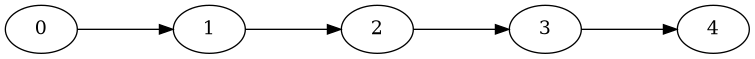

In [ ]:
# Simple graph example 1
# Create edge list (directed graph) and the number of nodes (matrix dimension)
edges = [(0, 1), (1, 2), (2, 3), (3, 4)]
num_nodes = 5

In [5]:
# Create a square adjacency matrix using BOOL type
R1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

# Insert edges into the adjacency matrix
for src, dst in edges:
    R1[src, dst] = True
print('R1 = \n'+ str(R1) + '\n')
        
# Print the transitive closure matrix
print('closure R2* = \n' + str(BMLP_RMS(R1, print_matrix=True)) + '\n')

R1 = 
      0  1  2  3  4
  0|     t         |  0
  1|        t      |  1
  2|           t   |  2
  3|              t|  3
  4|               |  4
      0  1  2  3  4

R = R2 + I = 
      0  1  2  3  4
  0|  t  t         |  0
  1|     t  t      |  1
  2|        t  t   |  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

fixpoint = 
      0  1  2  3  4
  0|  t  t  t      |  0
  1|     t  t  t   |  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

fixpoint = 
      0  1  2  3  4
  0|  t  t  t  t  t|  0
  1|     t  t  t  t|  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

fixpoint = 
      0  1  2  3  4
  0|  t  t  t  t  t|  0
  1|     t  t  t  t|  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

R0* = 
      0  1  2  3  4
  0|     t  t  t  t|  0
  1|        t  t  t|  1
  2|           t  t|  2
  3|              t|  3
  4|            

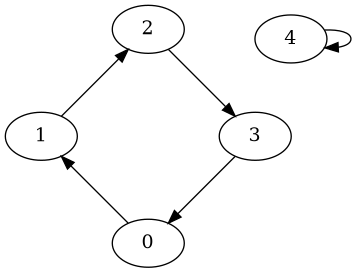

In [ ]:
# Simple graph example 2
# Create edge list (directed graph) and the number of nodes (matrix dimension)
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 4)]
num_nodes = 5

In [7]:
# Create a square adjacency matrix using BOOL type
R1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

# Insert edges into the adjacency matrix
for src, dst in edges:
    R1[src, dst] = True
print('R1 = \n'+ str(R1) + '\n')
        
# Print the transitive closure matrix
print('closure R2* = \n' + str(BMLP_RMS(R1)) + '\n')

R1 = 
      0  1  2  3  4
  0|     t         |  0
  1|        t      |  1
  2|           t   |  2
  3|  t            |  3
  4|              t|  4
      0  1  2  3  4

closure R2* = 
      0  1  2  3  4
  0|  t  t  t  t   |  0
  1|  t  t  t  t   |  1
  2|  t  t  t  t   |  2
  3|  t  t  t  t   |  3
  4|              t|  4
      0  1  2  3  4



In [8]:
# Create a vector to represent a query
V = gb.Vector.sparse(gb.BOOL, num_nodes)

# query the reachability of node 3
V[3] = True

print('closure V* = \n' + str(BMLP_SMP(V,R1)) + '\n')

closure V* = 
0| t
1| t
2| t
3| t
4|



In [9]:
from bmlp.Matrix import *

R1 = gb.Matrix.sparse(gb.BOOL, 3, 3)
R1[0,0] = True
R1[0,1] = True
R1[1,2] = True
# R1 = R1.apply(gb.types.BOOL.LNOT)
print(R1)

print(matrix_negate(R1))


      0  1  2
  0|  t  t   |  0
  1|        t|  1
  2|         |  2
      0  1  2
      0  1  2
  0|        t|  0
  1|  t  t   |  1
  2|  t  t  t|  2
      0  1  2


In [10]:
import random, time

# Complex graph
num_nodes = 5000
all_edges = [(i, j) for i in range(num_nodes) for j in range(num_nodes)]
print('No. edges: ' + str(len(all_edges)))

No. edges: 25000000


In [11]:
# num_reps = 10
# p = 0.5
# total_time = []

# # repeat num_reps times
# for i in range(num_reps):

#     # sample edges with edge probability < p
#     sampled_edges = list(filter(lambda _: random.random() < p, all_edges))

#     # Create a square adjacency matrix using BOOL type
#     empty_matrix = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
#     R1 = empty_matrix

#     # Insert edges into the adjacency matrix
#     for src, dst in sampled_edges:
#         R1[src, dst] = True
#     R1.to_binfile("large")

#     # Run and time the BMLP-RMS module
#     start_time = time.time()
#     BMLP_RMS(R1)
#     end_time = time.time()

#     total_time.append(end_time - start_time)
#     print('Wall time: ' + str(end_time - start_time))

# print('Mean wall time: ' + str(np.mean(total_time)))
# print('Wall time sterr: ' + str(np.std(total_time) / np.sqrt(len(total_time))))


In [16]:
num_reps = 10
p = 0.5
total_time = []

# repeat num_reps times
for i in range(num_reps):

    # sample edges with edge probability < p
    sampled_edges = list(filter(lambda _: random.random() < p, all_edges))

    # Create a square adjacency matrix using BOOL type
    empty_matrix = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
    R1 = empty_matrix

    # Insert edges into the adjacency matrix
    for src, dst in sampled_edges:
        R1[src, dst] = True
        
    # Create a vector to represent a query
    V = gb.Vector.sparse(gb.BOOL, num_nodes)

    # query the reachability of node 3
    V[1] = True

    # Run and time the BMLP-SMP module
    start_time = time.time()
    BMLP_SMP(V,R1)
    end_time = time.time()

    total_time.append(end_time - start_time)
    print('Wall time: ' + str(end_time - start_time))

print('Mean wall time: ' + str(np.mean(total_time)))
print('Wall time sterr: ' + str(np.std(total_time) / np.sqrt(len(total_time))))

Wall time: 0.03590989112854004
Wall time: 0.025182008743286133
Wall time: 0.038556575775146484
Wall time: 0.04738473892211914
Wall time: 0.038585662841796875
Wall time: 0.03030228614807129
Wall time: 0.0433502197265625
Wall time: 0.0416560173034668
Wall time: 0.02654719352722168
Wall time: 0.041449785232543945
Mean wall time: 0.03689243793487549
Wall time sterr: 0.002212334799053509
